# Wai Yu Amanda, Ng
- Student number: 1008217350
- UTORid: ngwai11

## 0. Find data set on kaggle.

In [14]:
# Import dataset "Crime Replication Dataset"
import pandas as pd; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; import random


url = "https://github.com/amanda-ng518/STA365/blob/62e724be1797cc0eb1e6524d3c5bd557e11424e1/crime_replication.csv?raw=true"
df = pd.read_csv(url)

random.seed(1008217350)

## 1. Provide posterior inference for a column of data with a PyMC normal-gamma specification.

The column "fear of crime" is chosen which demonstrates a normal distribution. According to the plot below, the distribution of "fear of crime" looks relatively symmetric bell-shaped with peak at around 2.5.

Text(0.5, 1.0, 'Histogram of fear_of_crime')

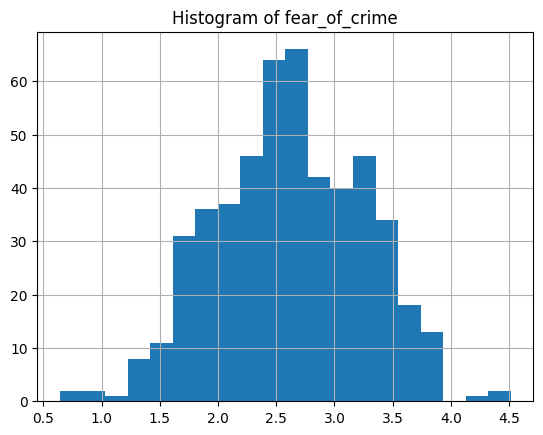

In [15]:
# Histogram of "fear_of_crime"
df.hist(column = "fear_of_crime", bins=20)
plt.title('Histogram of fear_of_crime')

###  `PyMC`: Probabilistic Programming

The code below demonstrates the model our observed data "fear of crime" follows a normal distribution with mean theta and precison phi.

Mean theta prior follows a Normal distribution and Precison theta prior follows a Gamma distribution.

We specify our initiate prior hyperparameters for the algorithm as
- theta = 0, tau = 1 in Normal prior model
- alpha = 2, beta = 1/2 in Gamma prior model

In [17]:
# MCMC Models
theta_0,tau = 0,1; alpha,beta = 2,1/2 # Initialize Prior Hyperparameters: specify prior distributions
fear_of_crime = df["fear_of_crime"]

import pymc as pm
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=fear_of_crime)

### Posterior Sampling

Here, we generates some posterior samples by HMC with the normal-gamma model we specified above.

In [18]:
# MCMC Sampling
with normal_gamma_toy_model:
    idata_HMC = pm.sample()

### "Convergence" Checks

The split-rhats for theta (1.0035) and phi (1.00072) are both below 1.05, so the markov chains converges.

HMC Split-Rhats {'theta': 1.0035, 'phi': 1.0072} | 

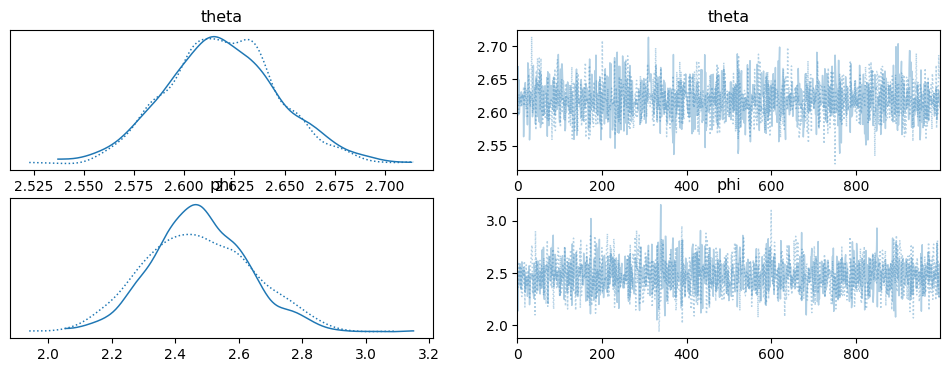

In [19]:
import arviz as az
az.plot_trace(idata_HMC)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ')

### Effective Sample Size

See ess_bulk for effective sample sizes. We generated 2000 samples in total.
For theta, around 96% of the sample generated are effective.
For phi, around 99% of the sample generated are effective. Both proportions are high.

In [20]:
print("number of MCMC samples:", idata_HMC.posterior['phi'].values.flatten().shape[-1])
az.summary(idata_HMC, round_to=2)

number of MCMC samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,2.62,0.03,2.57,2.67,0.0,0.0,1927.27,1419.67,1.00
phi,2.48,0.16,2.18,2.78,0.0,0.0,1994.16,1365.69,1.01


### Credible Intervals
Below are some 95% bayesian credible intervals generated for theta and phi for each chain and combining all chains.

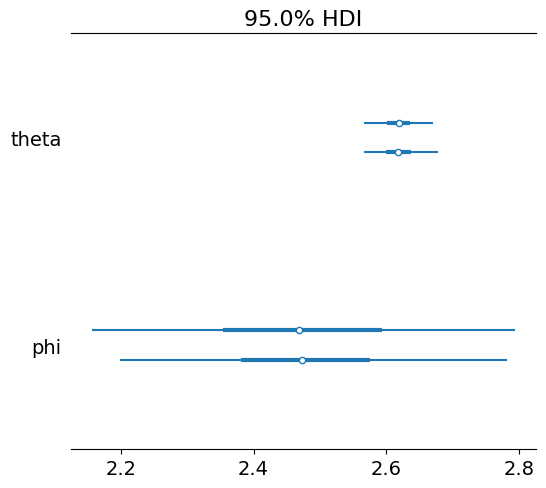

In [21]:
# Not combined: one HDI per markov chain
az.plot_forest(idata_HMC, var_names=["theta","phi"], combined=False, hdi_prob=0.95);

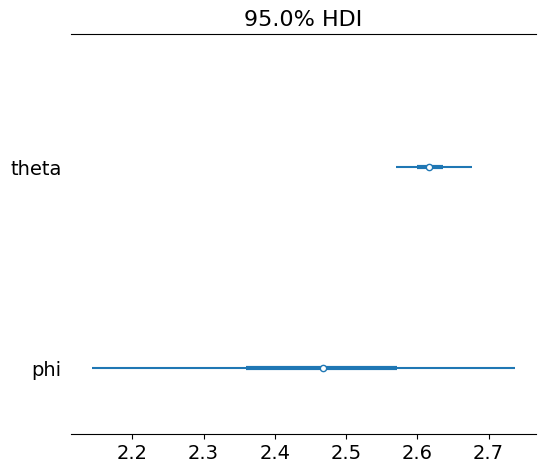

In [13]:
# Combined
az.plot_forest(idata_HMC, var_names=["theta","phi"], combined=True, hdi_prob=0.95);

## 2. Find a different column of data for which a normal-gamma specification isn't justified

The column "crime_victim" is chosen which demonstrates a bernoulli distribution. According to kaggle dataset discription, Crime_victim categorizes whether a participant has experienced being a victim of crime, with options "Yes" or "No."

Text(0.5, 1.0, 'Bar Chart of crime_victim')

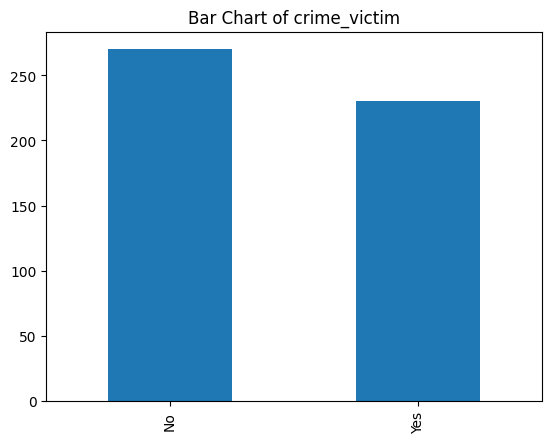

In [22]:
# Bar chart  of "crime_victim"
df['crime_victim'].value_counts().plot(kind='bar')
plt.title('Bar Chart of crime_victim')


## 3. Create a different PyMC specification that IS appropriate for this new data column:

In [23]:
crime_victim = df['crime_victim'].map({'Yes': 1, 'No': 0})
crime_victim = pd.DataFrame(crime_victim)

###  `PyMC`: Probabilistic Programming

As observed above, "crime victim" follows a bernoulli distribution with parameter unknown theta. We will impose a uniform prior to theta (restricted to be in between 0 and 1 since theta is a probability). Also, the yes and no responses to "crime victim" data seems to be pretty equal, hence we will initiate algorithm with theta = 0.5 in the prior.

In [24]:
# MCMC Models
theta_0= 0.5 # Initialize Prior Hyperparameters: specify prior distributions

import pymc as pm
bernoulli_uniform_toy_model = pm.Model()
with bernoulli_uniform_toy_model:
    theta = pm.Uniform("theta", lower=0, upper=1) # Uniform prior chosen with theta between 0 and 1
    x_obs = pm.Bernoulli("likelihood", p=theta, observed=crime_victim)
    # crime_victims follows a bernoulli distribution since it can only take one of the two values (0 or 1)

### Posterior Sampling
Here, we generates some posterior samples by HMC with the bernoulli-uniform model we specified above.

In [25]:
# MCMC Sampling
with bernoulli_uniform_toy_model:
    idata_HMC = pm.sample()

## 4. Provide posterior inference for the parameters of your new specification given the column of non-normal data using PyMC and provide an analysis of the MCMC chains.

### "Convergence" Checks

The split-rhats for theta (1.0007) is below 1.05, so the markov chains converges.

HMC Split-Rhats {'theta': 1.0007} | 

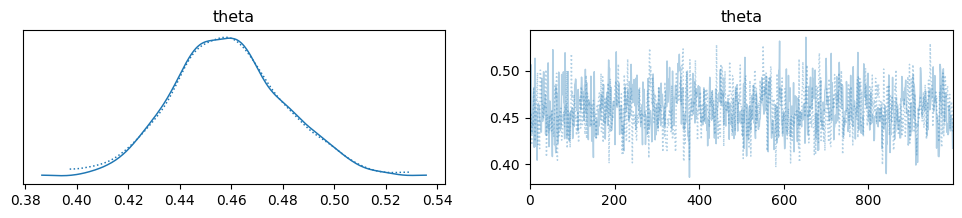

In [26]:
import arviz as az
az.plot_trace(idata_HMC)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ')

### Effective Sample Size

See ess_bulk for effective sample sizes. We generated 2000 samples in total.
For theta, around 36% of the sample generated are effective, which is less than a half.

In [27]:
print("number of MCMC samples:", idata_HMC.posterior['theta'].values.flatten().shape[-1])
az.summary(idata_HMC, round_to=2)

number of MCMC samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.46,0.02,0.42,0.5,0.0,0.0,723.29,1274.49,1.0


### Credible Interval
Below are some 95% bayesian credible intervals generated for theta for each chain and combining all chains.

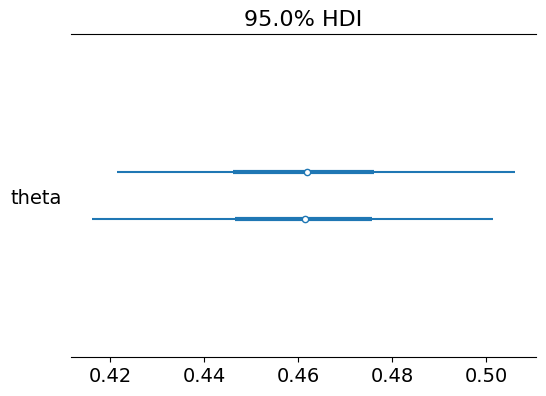

In [ ]:
# Not combined: one HDI per markov chain
az.plot_forest(idata_HMC, var_names=["theta"], combined=False, hdi_prob=0.95);

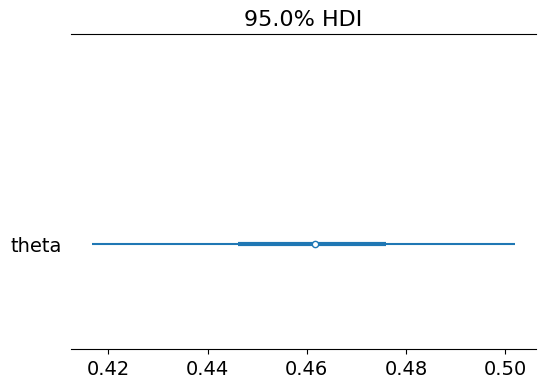

In [ ]:
# Combined
az.plot_forest(idata_HMC, var_names=["theta"], combined=True, hdi_prob=0.95);